In [ ]:
#Ans 1

f(x) = w^T * x + b

where:

f(x) is the decision function for input feature vector x.
w is the weight vector that determines the orientation of the hyperplane.
b is the bias term that determines the position of the hyperplane along the perpendicular axis.
x is the input feature vector.
^T denotes the transpose operation.

In [ ]:
#Ans 2

The objective function of a linear Support Vector Machine (SVM) is to maximize the margin between the two classes, 
subject to the constraint that the samples are classified correctly. Mathematically, the objective function of a linear 
SVM can be expressed as an optimization problem:

minimize: 1/2 * ||w||^2

subject to: y_i * (w^T * x_i + b) >= 1 for all i = 1, 2, ..., N

where:

||w|| is the Euclidean norm of the weight vector w, which determines the orientation of the hyperplane.
y_i is the binary class label (-1 or 1) for each training sample x_i.
w^T is the transpose of the weight vector w.
x_i is the input feature vector for each training sample.
b is the bias term that determines the position of the hyperplane along the perpendicular axis.
N is the total number of training samples.
The constraint y_i * (w^T * x_i + b) >= 1 ensures that all samples are correctly classified with a margin of at least 1, 
as SVMs aim to find a hyperplane that best separates the two classes with the widest possible margin. The objective 
function 1/2 * ||w||^2 represents the regularization term that encourages finding a hyperplane with a large margin, as 
smaller values of ||w|| lead to a wider margin. Therefore, the objective of a linear SVM is to find the optimal values for 
w and b that minimize the regularization term while satisfying the classification constraint, resulting in a hyperplane that 
maximizes the margin between the classes.

In [ ]:
#Ans 3 

The kernel trick is a technique used in Support Vector Machines (SVMs) that allows SVMs to efficiently and effectively 
model nonlinear decision boundaries without explicitly transforming the input data into a higher-dimensional feature space. 
It is a form of implicit feature mapping that avoids the computational cost of explicitly mapping data into a higher-dimensional
space, while still benefiting from the enhanced modeling capability of higher-dimensional feature spaces.

In a linear SVM, the decision boundary is a hyperplane that separates the data into different classes. However, in many 
real-world scenarios, the data may not be linearly separable, and a linear decision boundary may not be optimal for accurate 
classification. The kernel trick overcomes this limitation by implicitly mapping the input data into a higher-dimensional 
feature space where the data may become linearly separable, even if it is not in the original input space.

The kernel trick works by introducing a kernel function, also known as a kernel or kernel matrix, which computes the inner 
product between pairs of data points in the input space. The kernel function takes the place of the explicit feature mapping, 
allowing SVMs to work with the inner product of feature vectors in a higher-dimensional space without actually computing the 
transformed feature vectors explicitly. This avoids the need to explicitly represent the data in the higher-dimensional space, 
which can be computationally expensive, especially for large datasets.

Mathematically, in a kernelized SVM, the decision function can be expressed as:

f(x) = Σ [α_i * y_i * K(x_i, x)] + b

where:

f(x) is the decision function for input feature vector x.
α_i are the Lagrange multipliers obtained during the SVM training.
y_i are the binary class labels for the training samples.
K(x_i, x) is the kernel function that computes the inner product between feature vectors x_i and x.
b is the bias term.
x_i are the training samples in the input space.
Commonly used kernel functions include the linear kernel, polynomial kernel, Gaussian (RBF) kernel, and sigmoid kernel, 
among others. The choice of kernel function depends on the data and problem at hand, and the kernel trick allows SVMs to 
model complex, nonlinear decision boundaries by implicitly transforming the data into higher-dimensional feature spaces using 
the kernel function.

In [ ]:
#Ans 4

Support vectors in SVM are the training samples closest to the decision boundary (hyperplane) that determine the position, 
orientation, and width of the margin. They play a crucial role in defining the decision boundary, maximizing the margin, and 
determining classification accuracy.

In [ ]:
#Ans 5

Hyperplane: A hyperplane is a decision boundary that separates the data points of different classes in SVM. 
In a binary classification problem, a hyperplane is a line in a 2D feature space, a plane in a 3D feature space, 
and a hyperplane in higher-dimensional feature spaces.

In [ ]:
Marginal plane: The marginal plane is a parallel plane to the hyperplane that passes through the closest data points of each 
class. It is used to define the margin in SVM, which is the distance between the hyperplane and the marginal plane.

In [ ]:
Soft margin: Soft margin allows for some misclassification of training samples to achieve a balance between achieving a wide 
margin and allowing for some classification errors. It introduces a slack variable that allows data points to be 
misclassified up to a certain extent.

In [ ]:
Hard margin: Hard margin requires that all training samples be correctly classified, and no misclassifications are allowed. 
It results in a narrower margin and may not be suitable for cases where the data points are not perfectly separable.

In [ ]:
#Ans 6
SVM Implementation through Iris dataset.

Bonus task: Implement a linear SVM classifier from scratch using Python and compare its
performance with the scikit-learn implementation.
~ Load the iris dataset from the scikit-learn library and split it into a training set and a testing setl
~ Train a linear SVM classifier on the training set and predict the labels for the testing setl
~ Compute the accuracy of the model on the testing setl
~ Plot the decision boundaries of the trained model using two of the featuresl
~ Try different values of the regularisation parameter C and see how it affects the performance of
the model.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [48]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only first two features for visualization
y = iris.target

In [49]:
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [50]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [51]:
pd.DataFrame(X)[0]

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: 0, Length: 150, dtype: float64

<AxesSubplot:xlabel='0', ylabel='1'>

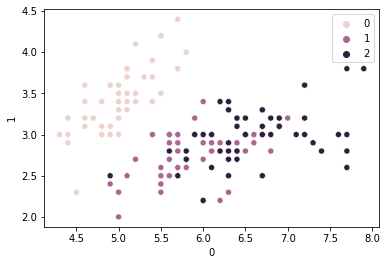

In [52]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [54]:
from sklearn.svm import SVC

In [55]:
svc=SVC(kernel='linear')

In [56]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [57]:
svc.coef_

array([[-2.02367527,  2.27771296],
       [-2.08613616,  1.59528247],
       [-1.31572642, -0.96516764]])

In [58]:
y_pred = svc.predict(X_test)

In [59]:
y_pred

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 2, 2, 0, 0, 0, 2, 2,
       1, 0, 1, 0, 1, 1, 2, 2, 2, 1, 2, 1, 1, 0, 2, 2])

In [60]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

In [61]:
print(classification_report (y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.75      0.80      0.77        15
           2       0.73      0.67      0.70        12

    accuracy                           0.82        38
   macro avg       0.83      0.82      0.82        38
weighted avg       0.82      0.82      0.81        38



In [62]:
print(confusion_matrix (y_test,y_pred))

[[11  0  0]
 [ 0 12  3]
 [ 0  4  8]]


In [63]:
print(accuracy_score (y_test,y_pred))

0.8157894736842105


In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
param_grid= {'C':[0.1,1,10,100,1000],
            'gamma':[1,0.1,0.01,0.001,0.0001],
            'kernel':['linear']}

In [67]:
grid = GridSearchCV(SVC(), param_grid = param_grid, refit = True, cv = 5, verbose = 3)

In [69]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.826 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.957 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.636 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.773 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.864 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.826 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.957 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.636 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.773 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.864 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.826 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

[CV 5/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.864 total time=   0.0s
[CV 1/5] END C=1000, gamma=0.001, kernel=linear;, score=0.783 total time=   0.0s
[CV 2/5] END C=1000, gamma=0.001, kernel=linear;, score=0.870 total time=   0.0s
[CV 3/5] END C=1000, gamma=0.001, kernel=linear;, score=0.727 total time=   0.0s
[CV 4/5] END C=1000, gamma=0.001, kernel=linear;, score=0.773 total time=   0.0s
[CV 5/5] END C=1000, gamma=0.001, kernel=linear;, score=0.864 total time=   0.0s
[CV 1/5] END C=1000, gamma=0.0001, kernel=linear;, score=0.783 total time=   0.0s
[CV 2/5] END C=1000, gamma=0.0001, kernel=linear;, score=0.870 total time=   0.0s
[CV 3/5] END C=1000, gamma=0.0001, kernel=linear;, score=0.727 total time=   0.0s
[CV 4/5] END C=1000, gamma=0.0001, kernel=linear;, score=0.773 total time=   0.0s
[CV 5/5] END C=1000, gamma=0.0001, kernel=linear;, score=0.864 total time=   0.0s


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)